## bitslicing representation

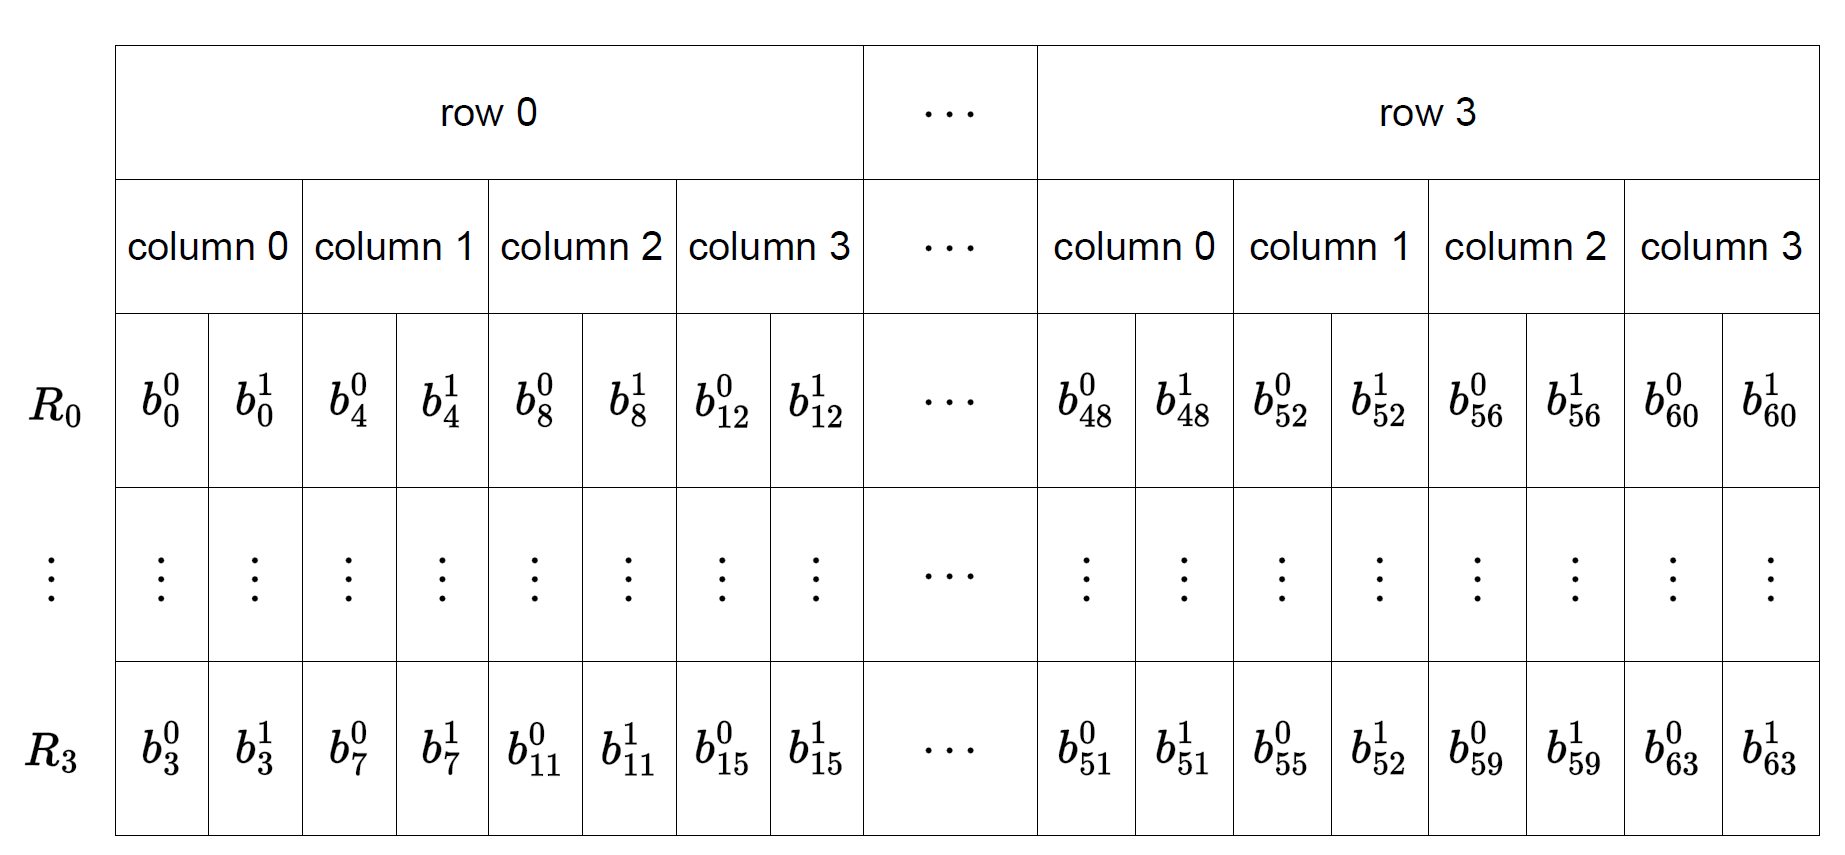

In [42]:
def byte_to_bitslicing(b0, b1):
    b0_b = bin(b0)[2:].zfill(64)
    b1_b = bin(b1)[2:].zfill(64)
    R0_b = ""
    R1_b = ""
    R2_b = ""
    R3_b = ""
    for i in range(0, len(b0_b), 4):
        R0_b += b0_b[i]
        R0_b += b1_b[i]

        R1_b += b0_b[i + 1]
        R1_b += b1_b[i + 1]

        R2_b += b0_b[i + 2]
        R2_b += b1_b[i + 2]

        R3_b += b0_b[i + 3]
        R3_b += b1_b[i + 3]

    return int(R0_b, 2), int(R1_b, 2), int(R2_b, 2), int(R3_b, 2)

b0 = 0x88_88_44_44_22_22_11_11
b1 = 0x88_88_44_44_22_22_11_11
R0, R1, R2, R3 = byte_to_bitslicing(b0, b1)
if R0 == 0xff000000 and R1 == 0xff0000 and R2 == 0xff00 and R3 == 0xff:
    print("Correct")

Correct
